# HomeWork 8

**DeadLine : 23:59 29 Aban 1399**

**Total points : 100 pts**

Import some prerequisites.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 2

Here is for your helper functions (optional).

Implement this function to create panorama image from two input images.

In [12]:
def stitch(image1, image2):
    '''
    Creates panorama image of two inputs.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''
    
    out_img = None
    
    #Write your code here
    stitcher = cv2.Stitcher_create(0)
    out_img = stitcher.stitch((image1, image2))[1]
    
    return out_img

Test your implementation (dont change this cell)

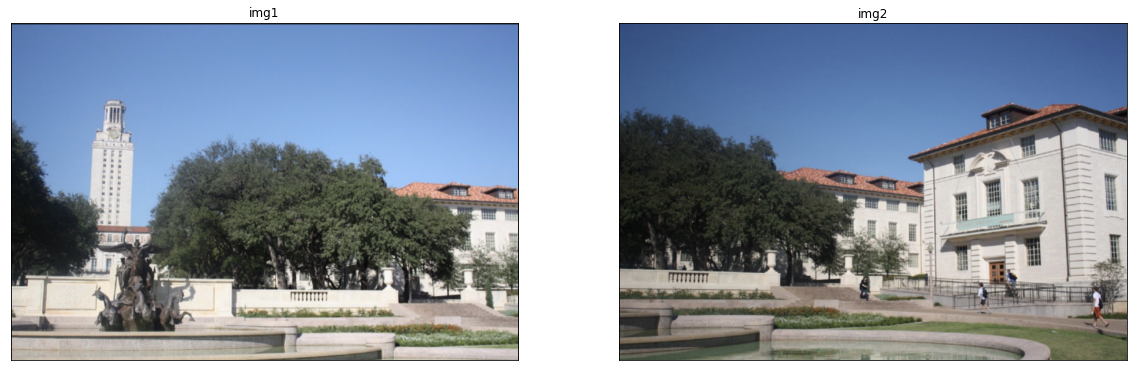

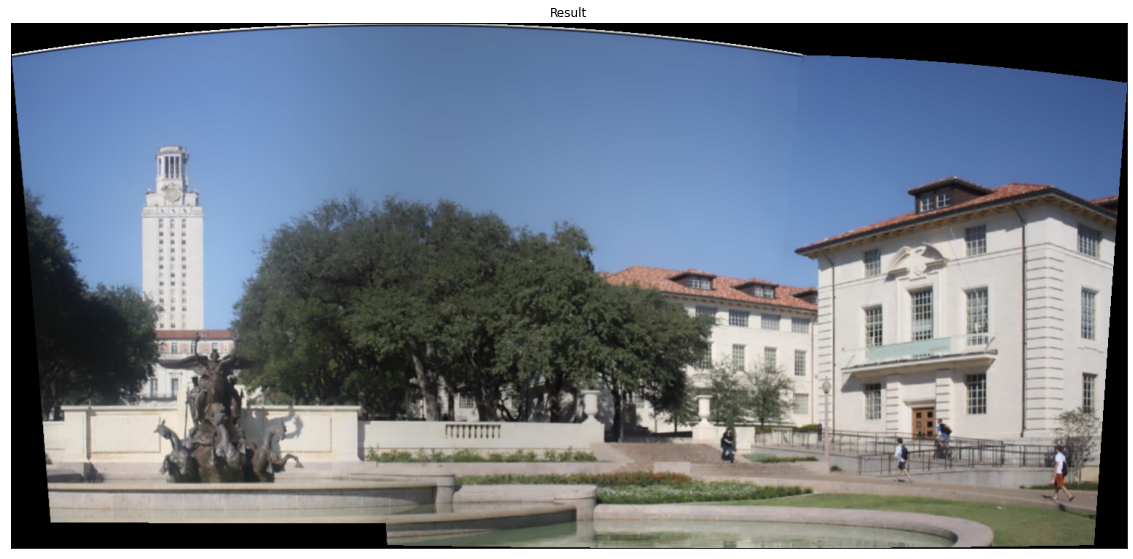

In [13]:
image_list = []

image1 = cv2.imread(os.path.join('images', '2a.png'))
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image_list.append([image1, 'img1', 'img'])

image2 = cv2.imread(os.path.join('images', '2b.png'))
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image_list.append([image2, 'img2', 'img'])

plotter(image_list, 1, 2, True, 20, 10, '2_1')

image_list = []
image_list.append([stitch(image1,image2), 'Result', 'img'])

plotter(image_list, 1, 1, True, 20, 10, '2_2')

# PART 3

Here is for your helper functions (optional).

In [13]:
!pip install dlib

     |████████████████████████████████| 3.2 MB 242 kB/s eta 0:00:01
  Created wheel for dlib: filename=dlib-19.21.0-cp38-cp38-macosx_10_15_x86_64.whl size=3324002 sha256=6972b3e3e10389d8ace172ec91602aecf964adbc4c6562466c36013873c631f6
  Stored in directory: /Users/mahsa/Library/Caches/pip/wheels/3a/4e/b6/77346839e430150a62d9b46bf7e0a37181fe01fd07d5d452a7
Successfully built dlib


In [5]:
import dlib
from imutils import face_utils
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    
    return coords

Implement this function to create result image with added mask.

In [6]:
def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    result = face.copy()
    
    #Write your code here
    cornersMask = []
    cornerResult = []
    count = 0
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("facial-landmarks/shape_predictor_68_face_landmarks.dat")
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        for (x, y) in shape:
            count += 1
            if count == 2 or count == 4 or count == 13 or count == 15:
                cornerResult.append((x, y))
        
        cornersMask = np.float32([[200,260],[225, 475],[970, 470],[990, 260]])
        cornersResult = np.float32([[cornerResult[0][0],cornerResult[0][1]],[cornerResult[1][0],cornerResult[1][1]],
                                    [cornerResult[2][0],cornerResult[2][1]],[cornerResult[3][0],cornerResult[3][1]]])
        mat = cv2.getPerspectiveTransform(cornersMask, cornersResult)
        transformed_mask = cv2.warpPerspective(mask, mat, dsize=(700,700))
        
        result[transformed_mask != 0] = transformed_mask[transformed_mask != 0]
        
    return result

Test your implementation (dont change this cell)

(700, 700, 3) (800, 1200, 3)


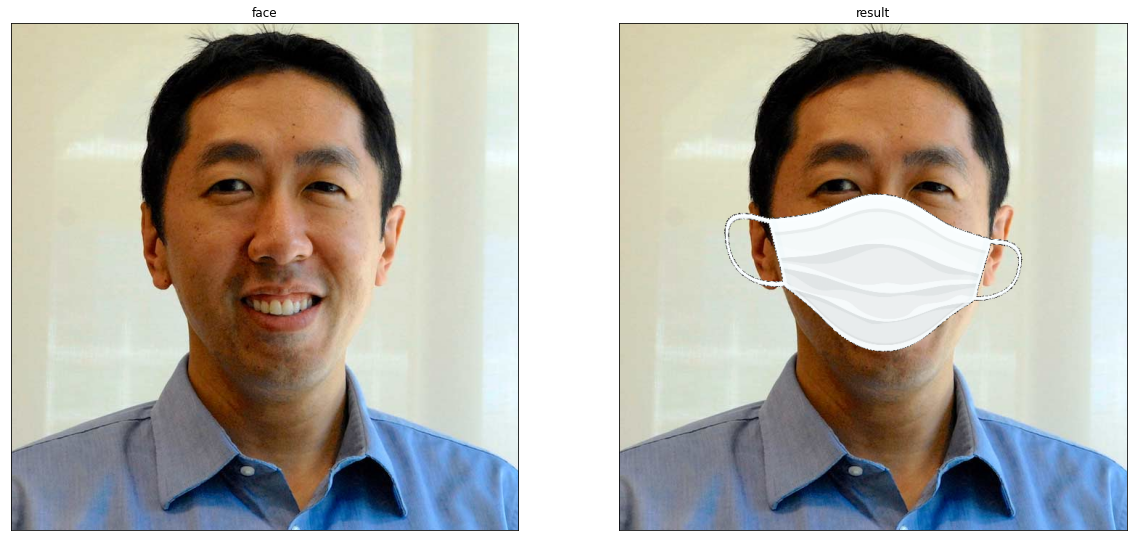

In [7]:
image_list = []

face = cv2.imread(os.path.join('images', 'face.jpg'))
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])

mask = cv2.imread(os.path.join('images', 'mask.png'))
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

image_list.append([put_mask(face, mask), 'result', 'img'])

plotter(image_list, 1, 2, True, 20, 10, '3')

for create proper files for sending in quera run this cell.

In [233]:
!python notebook_converter.py

End!!!